In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Identity metrics

In [22]:
identity_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/identity_ood_metrics_encoded_HT29_TNFA.csv",
                              index_col=0)

In [23]:
identity_metrics.mean(1)

r_squared           0.971364
sinkhorn_div_1      7.531210
sinkhorn_div_10     2.218539
sinkhorn_div_100    1.555487
e_distance          3.046393
mmd                 0.011208
dtype: float64

CellFlow

In [24]:
cellflow_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/cellflow_ood_metrics_encoded_HT29_TNFA.csv",
                              index_col=0)

In [25]:
cellflow_metrics.mean(1)

r_squared           0.971726
sinkhorn_div_1      7.542972
sinkhorn_div_10     2.258468
sinkhorn_div_100    1.562017
e_distance          3.046748
mmd                 0.011855
dtype: float64

Metrics

In [26]:
mean_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/mean_train_metrics_encoded_HT29_TNFA.csv",
                              index_col=0)

In [27]:
mean_metrics.mean(1)

r_squared            -0.665551
sinkhorn_div_1       98.809150
sinkhorn_div_10      93.496326
sinkhorn_div_100     92.833272
e_distance          185.603091
mmd                   0.291156
dtype: float64

## Get gene list by distance from the controls 

In [28]:
identity_deg = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/identity_ood_metrics_deg_HT29_TNFA.csv",
                              index_col=0)

In [29]:
gene_list = identity_deg.T.sort_values(by="r_squared")
gene_list["perturbation"] = gene_list.index.copy()
gene_list = gene_list.reset_index(drop=True)

In [30]:
n_splits = 5
gene_list["Perturbation effect"] = None

range_cond = np.arange(len(gene_list))
range_cond_split = np.array_split(range_cond,n_splits)
for i, idx_list in enumerate(range_cond_split):
    gene_list.loc[idx_list, "Perturbation effect"] = i
gene_list = gene_list.set_index("perturbation") 

# Plot comparisons

In [32]:
merged = pd.concat([identity_metrics, mean_metrics, cellflow_metrics], axis=1).T

In [33]:
merged["Model"] = ["Identity"]*identity_metrics.shape[1] + ["Mean"]*mean_metrics.shape[1] + ["cellFlow"]*cellflow_metrics.shape[1]

In [34]:
perturbation_cat = []
for pert in merged.index:
    perturbation_cat.append(gene_list.loc[pert, "Perturbation effect"])
merged["Perturbation effect"] = perturbation_cat

In [35]:
pathways = []
cell_lines = []

for cat in merged.index:
    cell_line, pathway, _ = cat.split("_")
    pathways.append(pathway)
    cell_lines.append(cell_line)

In [36]:
# merged["pathway"] = pathways
# merged["cell_line"] = cell_lines
# merged = merged.loc[merged.pathway=="IFNG"]

In [37]:
merged

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,Model,Perturbation effect
HT29_TNFA_BIRC2,0.997182,5.522013,0.570337,0.171577,0.315698,0.002733,Identity,4
HT29_TNFA_BIRC3,0.999540,5.153348,0.456856,0.038445,0.054920,0.001761,Identity,2
HT29_TNFA_CASP10,0.995218,7.367614,1.316338,0.314188,0.549263,0.006556,Identity,0
HT29_TNFA_CEBPB,0.988954,6.963589,1.384056,0.673651,1.277312,0.006724,Identity,1
HT29_TNFA_CHUK,0.886274,11.487624,6.540964,6.007000,11.958749,0.036472,Identity,0
...,...,...,...,...,...,...,...,...
HT29_TNFA_SOX9,0.983209,9.023602,2.559202,0.994656,1.814799,0.011477,cellFlow,0
HT29_TNFA_TNFRSF1A,0.896118,11.495187,6.118225,5.388416,10.704434,0.034153,cellFlow,0
HT29_TNFA_TRAF2,0.981108,7.020376,1.711693,1.119070,2.183896,0.009999,cellFlow,2
HT29_TNFA_TRAF3,0.985250,6.618147,1.427301,0.895832,1.739830,0.008179,cellFlow,3


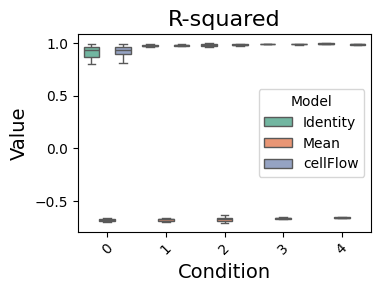

In [38]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="r_squared", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("R-squared", fontsize=16)
plt.xlabel("Condition", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

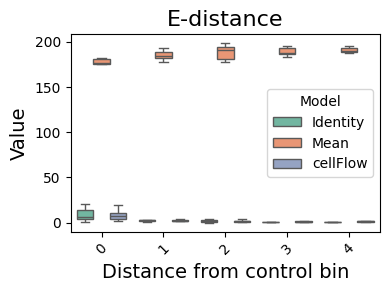

In [39]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("E-distance", fontsize=16)
plt.xlabel("Distance from control bin", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [20]:
# plt.figure(figsize=(4, 3))
# sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("E-distance", fontsize=16)
# plt.xlabel("Distance from control bin", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [51]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_100", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 100", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="mmd", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("MMD", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
s